# Module

## Module Constructor

**Module(model, name, parent=None)**

The Module class is used to structure SD DSL models into individual modules.

Modules can be nested.

If you create model elements such as stocks, flows and
converters via the module, the elments are added to the model, but the element
names are turned into fully qualified names of the form
parent_module_name.module_name.name.

The fully qualfied name is used as the equation
name in the Model class and is needed when making calls to bptk.run_scenario or
bptk.plot_scenario.

Check the [Beergame](/model_library/beergame/beergame_sd_dsl.ipynb) or [Enterprise Digital Twin](/model_library/enterprise_digital_twin/enterprise_digital_twin.ipynb) models to see the module class in action. 


## Module.biflow

**biflow(name)**

Add a [Biflow](./api_biflow.md) to the underlying model. The name of the biflow will be a fully qualified name
consisting of all nested module names plus the actual element name using dot
notation, i.e. namespace.name

## Module.constant

**constant(name)**

Add a [Constant](./api_constant.md) to the model. The name of the constant will be a fully qualified name
consisting of all nested module names plus the actual element name using dot
notation, i.e. namespace.name

## Module.converter

**converter(name)**

Add a [Converter](./api_converter.md) to the model. The name of the converter will be a fully qualified name
consisting of all nested module names plus the actual element name using dot
notation, i.e. namespace.name



## Module.flow

**flow(name)**

Add a [Flow](./api_flow.md) to the model. The name of the flow will be a fully qualified name
consisting of all nested module names plus the actual element name using dot
notation, i.e. namespace.name

## Module.fqn

**fqn(name)**

Given a name this returns the fully qualified name, i.e. name prefixed
by the module namespace.

The namespace is defined by the names of all parent modules, e.g. parent_module_name.module_name

* **Parameters**

    **name** – String
    The name that is to be converted into a fully qualified name.
    
* **Return**

    Return the fully qualified name, i.e. namespace.name

## Module.initialize

**initialize(module,...)**

Override this method in concrete Module subclasses and use it to define the model using Stocks, Flows, Converters and Constants.

Pass in any module dependencies as parameters.

* **Parameters**

    ** module ** Module subclass
    External module that contains model elements that are needed within the current module

## Module.stock

**stock(name)**

Add a [Stock](./api_stock.md) to the model. The name of the stock will be a fully qualified name consisting of all nested module names plus the actual element name using dot
notation, i.e. namespace.name

# Usage

Let's create a simple example model containing to modules _A_ and _B_ that depend on each other. 

In [1]:
from BPTK_Py import Model, Module

Set up a model that runs over 10 timesteps:

In [2]:
model = Model(starttime=1,stoptime=10,dt=1,name='model')

Now create to module classes that define the actual model:

In [3]:
class A(Module):

    def initialize(self,b):
        ## stocks

        stock = self.stock("stock")

        ## flows.

        flow = self.flow("flow")

        ## equations

        stock.initial_value = 0.0
        stock.equation = flow
        
        flow.equation = b.stock("stock")

In [4]:
class B(Module):

    def initialize(self,a):

        ## stocks
        stock = self.stock("stock")

        ## flows.
        flow = self.flow("flow")

        ## equations
        stock.initial_value = 1.0
        stock.equation = flow
    
        flow.equation = a.stock("stock")

Initialize the modules:

In [5]:
a = A(model,"a")
b = B(model,"b")

a.initialize(b)
b.initialize(a)

Plot the graph for the *a_module.a_stock* element:

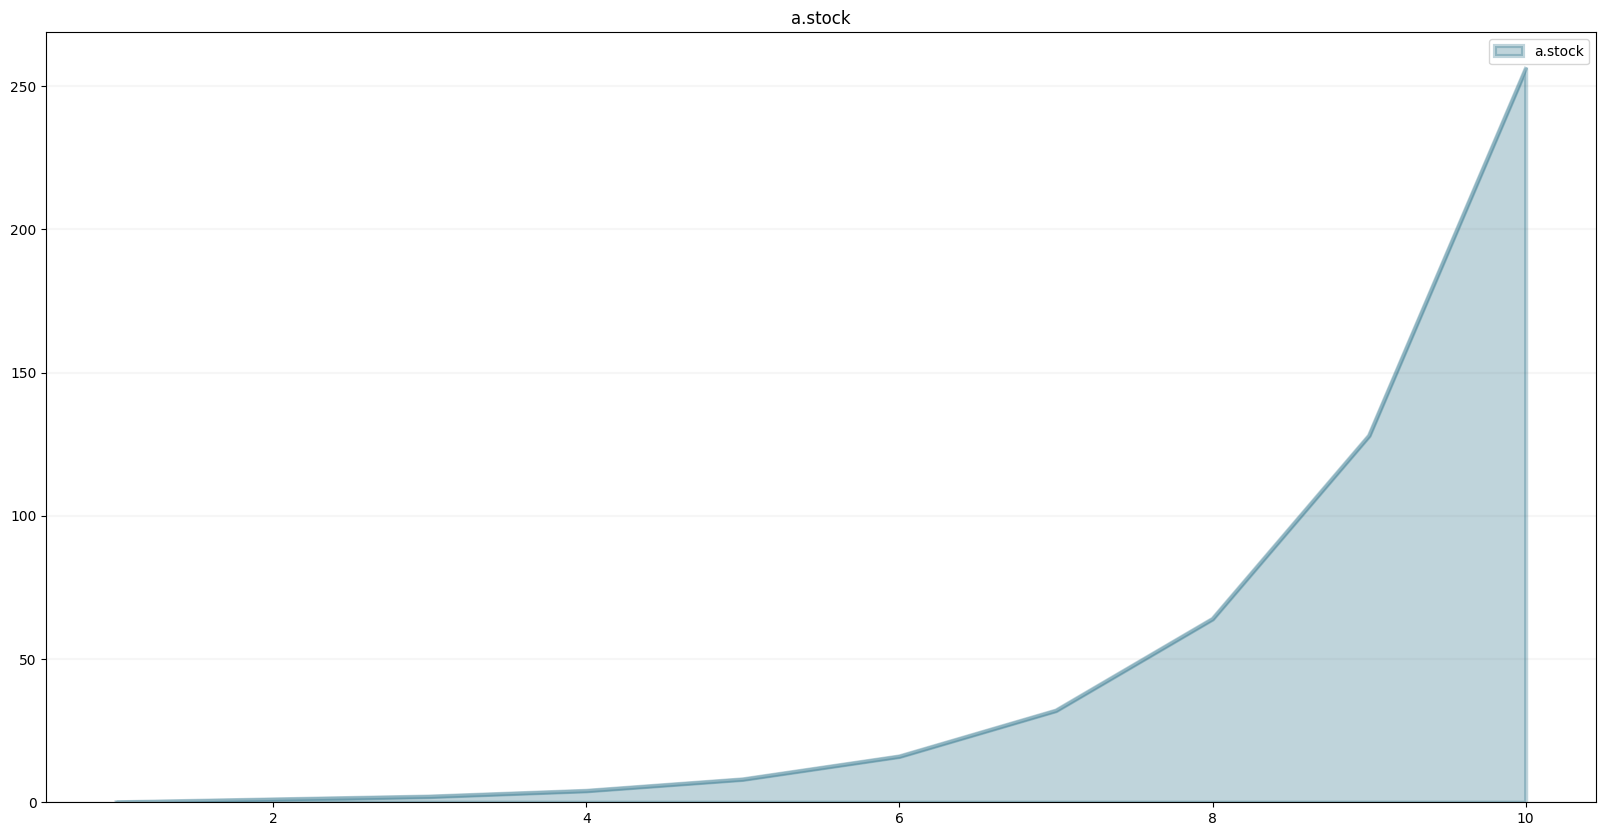

In [6]:
model.stock("a.stock").plot()

Of course you can also access the model element directly via their respective modules:

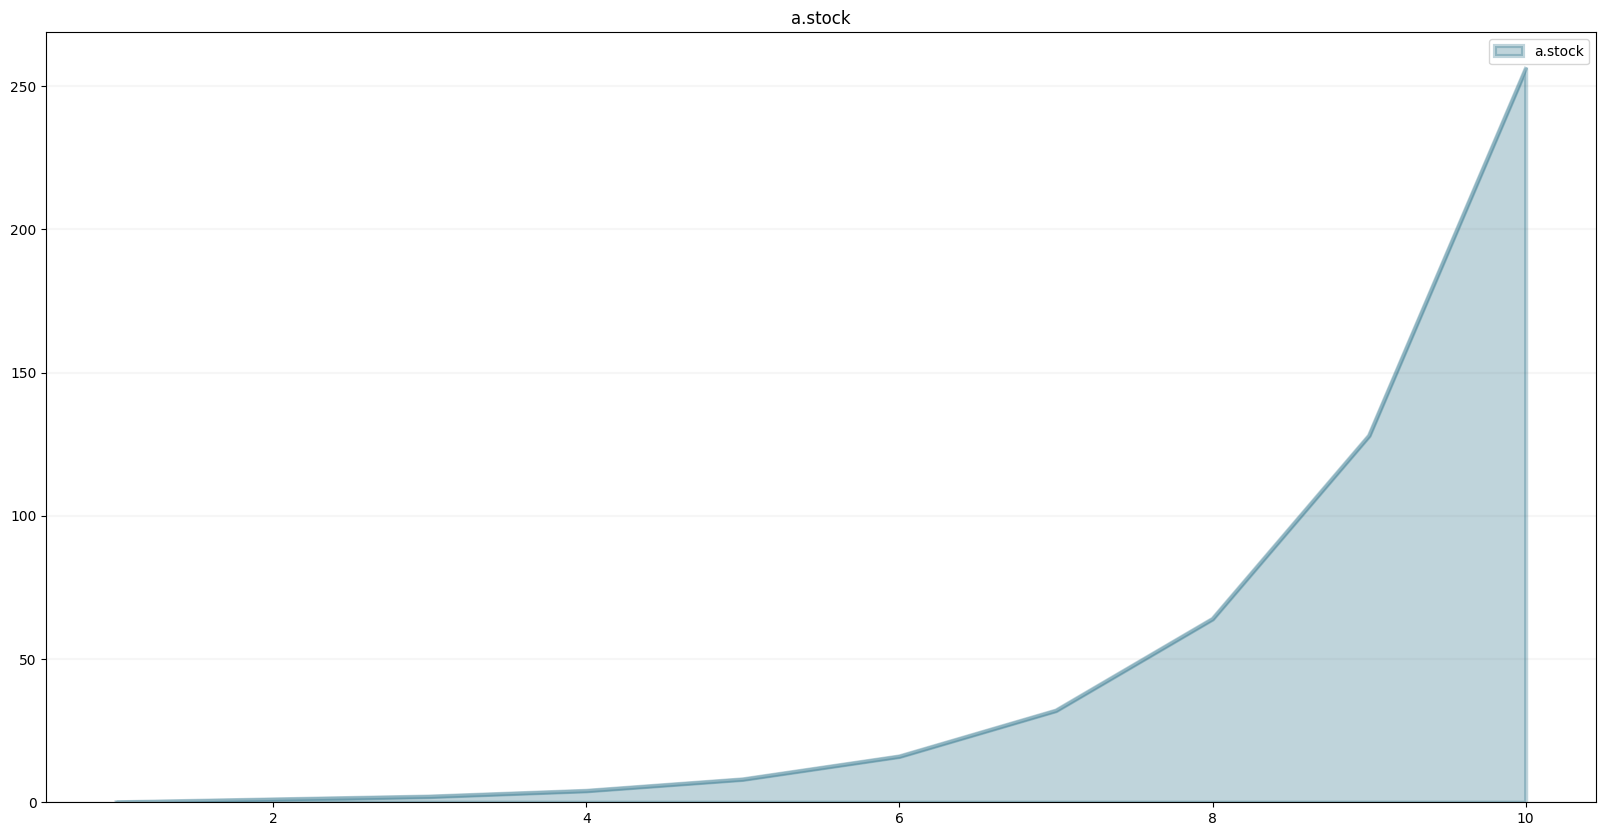

In [7]:
a.stock("stock").plot()

In practice you will probably set up and scenario managers and then access the model elements via the [bptk](./api_bptk.md) class.

In [8]:
from BPTK_Py import bptk
bptk = bptk()

In [9]:
bptk.register_scenario_manager(
    {
     "sm":
    {
        "model":model,
        "scenarios":
        {
            "base":{}    
        }
    
     }

    }
    )

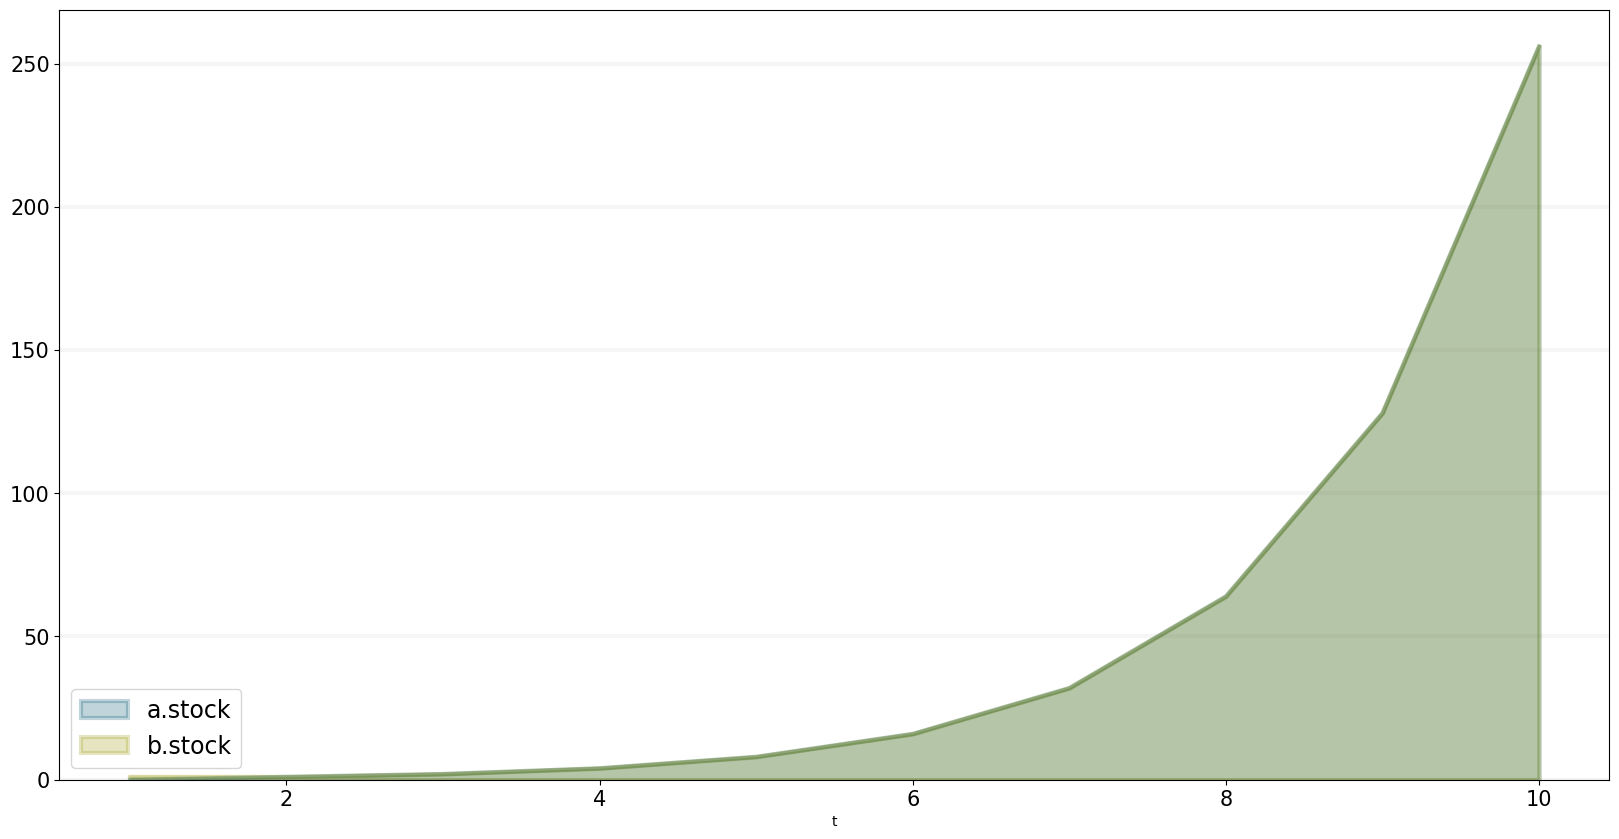

In [10]:
bptk.plot_scenarios(
    scenario_managers=["sm"],
    scenarios=["base"],
    equations=["a.stock","b.stock"]
)

During model development, it can be useful to list all model equations:

In [11]:
bptk.list_equations()

Available Equations:

Scenario Manager: sm
Scenario: base
--
	stock: 			a.stock
	stock: 			b.stock
	flow: 			a.flow
	flow: 			b.flow
 
